# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#import the libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


from keras.datasets import mnist

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#load the test and train data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


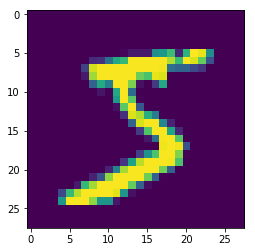

In [5]:
#training data shape
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#visualize first example
plt.imshow(X_train[0])

In [0]:
#reshape the training and test data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert to 'float32' and divide by 255 to scale it in [0,1] i.e standarization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
#print the 1st 10 training examples
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
#one hot encoded data
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 1. Base line model

In [11]:
#model without BN,DROPOUT,Large Batch Size,LearningRate scheduler
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))#RF=3
model.add(Convolution2D(32, 3,3, activation='relu'))#RF =5

model.add(MaxPooling2D((2,2)))#RF=10
model.add(Convolution2D(10, 1, activation='relu'))#RF=10

model.add(Convolution2D(16, 3,3, activation='relu'))#RF =12
model.add(Convolution2D(32, 3,3, activation='relu'))#RF =14

model.add(MaxPooling2D((2,2)))#RF=28
model.add(Convolution2D(10, 1, activation='relu'))#RF=28
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

W0903 06:51:33.674374 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0903 06:51:33.694983 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 06:51:33.699195 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)         

In [13]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0903 06:51:33.806751 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 06:51:33.828904 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
#fit the model
history=model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0903 06:51:34.038937 140561649452928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0903 06:51:34.109246 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 239us/step - loss: 0.2029 - acc: 0.9367 - val_loss: 0.0579 - val_acc: 0.9806
Epoch 2/15
60000/60000 [==============================] - 11s 190us/step - loss: 0.0697 - acc: 0.9787 - val_loss: 0.0560 - val_acc: 0.9812
Epoch 3/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0518 - acc: 0.9834 - val_loss: 0.0449 - val_acc: 0.9853
Epoch 4/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0361 - val_acc: 0.9875
Epoch 5/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0317 - val_acc: 0.9888
Epoch 6/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0323 - acc: 0.9895 - val_loss: 0.0358 - val_acc: 0.9878
Epoch 7/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.

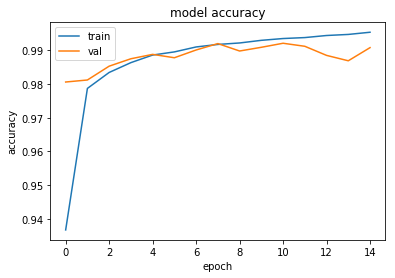

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

we can clearly see the gap between train and validation accuracy which implies that our model is over fitting

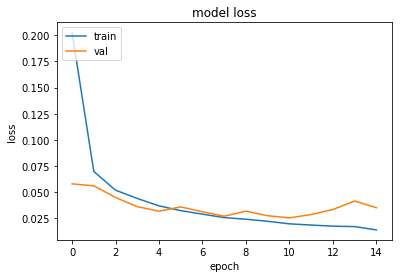

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Validation loss is more than train loss.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
#print the ['loss', 'acc']
print(score)

[0.0350346823152644, 0.9908]


In [0]:
#predict on test data
y_pred = model.predict(X_test)

### 2. Model with BatchNormalization

" Training Deep Neural Networks is complicated by the fact that the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities"-- <b>Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift, 2015</b> (https://arxiv.org/abs/1502.03167)

The authors of the paper introducing batch normalization refer to change in the distribution of inputs during training as <b>“internal covariate shift.”</b>

This process is also called “whitening” when applied to images in computer vision.

"By whitening the inputs to each layer, we would take a step towards achieving the fixed distributions of inputs that would remove the ill effects of the internal covariate shift."-- -- <b>Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift, 2015</b> (https://arxiv.org/abs/1502.03167)

In [20]:
#model with batch normalization
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))# RF=3
model.add(BatchNormalization())

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =5
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2)))#RF=10

model.add(Convolution2D(10, 1, activation='relu'))#RF=10
model.add(BatchNormalization())

model.add(Convolution2D(16, 3,3, activation='relu'))#RF =12
model.add(BatchNormalization())

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =14
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2)))#RF=28

model.add(Convolution2D(10, 1, activation='relu'))#RF=28
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0903 06:54:29.107989 140561649452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 10)       

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
#fit the model
history=model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 21s 348us/step - loss: 0.1640 - acc: 0.9515 - val_loss: 0.0640 - val_acc: 0.9794
Epoch 2/15
60000/60000 [==============================] - 19s 320us/step - loss: 0.0447 - acc: 0.9858 - val_loss: 0.0482 - val_acc: 0.9854
Epoch 3/15
60000/60000 [==============================] - 19s 319us/step - loss: 0.0334 - acc: 0.9896 - val_loss: 0.0380 - val_acc: 0.9871
Epoch 4/15
60000/60000 [==============================] - 19s 322us/step - loss: 0.0283 - acc: 0.9907 - val_loss: 0.0318 - val_acc: 0.9893
Epoch 5/15
60000/60000 [==============================] - 19s 320us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0289 - val_acc: 0.9893
Epoch 6/15
60000/60000 [==============================] - 19s 319us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0300 - val_acc: 0.9903
Epoch 7/15
60000/60000 [==============================] - 19s 325us/step - loss: 0.0183 - acc: 0.9940 - val_loss: 0.

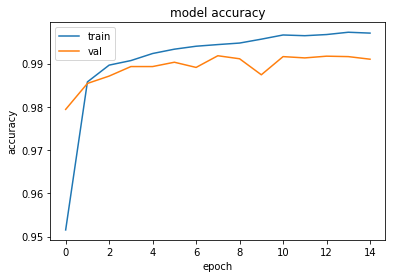

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

After adding batch normalization over all accuracy is reduced and gap between test and validation accuracy is increased.Model is still overfitting.Let's add dropout to introduce some regularization effect.

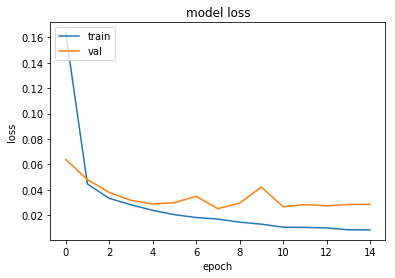

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Validation loss is more than train loss.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [27]:
#print the ['loss', 'acc']
print(score)

[0.028693445506317767, 0.991]


### 3. Model with BatchNormalization and Dropout

In [28]:
#model wih BatchNormalization and Dropout
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))#RF=3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D((2,2)))#RF=10

model.add(Convolution2D(10, 1, activation='relu'))#RF=10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3,3, activation='relu'))#RF =12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D((2,2)))#RF=28

model.add(Convolution2D(10, 1, activation='relu'))#RF=28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0903 06:59:21.612118 140561649452928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/lo

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)       

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
history=model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 381us/step - loss: 0.2033 - acc: 0.9389 - val_loss: 0.0552 - val_acc: 0.9823
Epoch 2/15
60000/60000 [==============================] - 21s 357us/step - loss: 0.0684 - acc: 0.9787 - val_loss: 0.0649 - val_acc: 0.9804
Epoch 3/15
60000/60000 [==============================] - 21s 355us/step - loss: 0.0559 - acc: 0.9824 - val_loss: 0.0310 - val_acc: 0.9906
Epoch 4/15
60000/60000 [==============================] - 21s 355us/step - loss: 0.0484 - acc: 0.9846 - val_loss: 0.0397 - val_acc: 0.9873
Epoch 5/15
60000/60000 [==============================] - 21s 358us/step - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0321 - val_acc: 0.9905
Epoch 6/15
60000/60000 [==============================] - 21s 354us/step - loss: 0.0408 - acc: 0.9868 - val_loss: 0.0418 - val_acc: 0.9871
Epoch 7/15
60000/60000 [==============================] - 22s 359us/step - loss: 0.0378 - acc: 0.9874 - val_loss: 0.

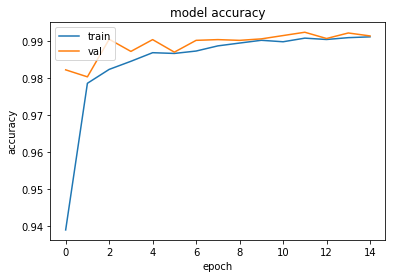

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It is evident from above plot that Dropout has helped us to solve the problem of overfitting.In last epoch validation accuracy is 99.3 which is close to our target.Let's add Learning rate scheduler and observe how it helps.

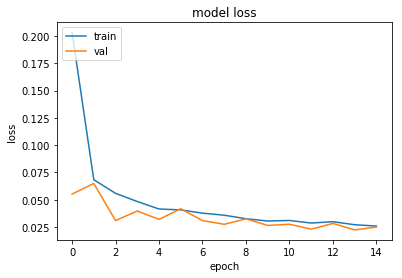

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Training and validation losses are comparable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [35]:
#print the ['loss', 'acc']
print(score)

[0.025041506116167876, 0.9915]


### 4. Model with BatchNormalization, Dropout and LearningRateScheduler

Sometimes this is called learning rate annealing or adaptive learning rates. Here we will call this approach a learning rate schedule, were the default schedule is to use a constant learning rate to update network weights for each training epoch.

These have the benefit of making large changes at the beginning of the training procedure when larger learning rate values are used, and decreasing the learning rate such that a smaller rate and therefore smaller training updates are made to weights later in the training procedure.

This has the effect of quickly learning good weights early and fine tuning them later.

In [36]:
#model wih BatchNormalization, Dropout and LearningRateScheduler
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))# RF=3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D((2,2)))#RF=10

model.add(Convolution2D(10, 1, activation='relu'))#RF=10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3,3, activation='relu'))#RF =12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3,3, activation='relu'))#RF =14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D((2,2)))#RF=28

model.add(Convolution2D(10, 1, activation='relu'))#RF=28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)       

In [0]:
#define the scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy'])



In [40]:
#fit the model
history=model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 225us/step - loss: 0.1616 - acc: 0.9510 - val_loss: 0.0461 - val_acc: 0.9850
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 188us/step - loss: 0.0609 - acc: 0.9813 - val_loss: 0.0316 - val_acc: 0.9901
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 187us/step - loss: 0.0498 - acc: 0.9849 - val_loss: 0.0289 - val_acc: 0.9911
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0411 - acc: 0.9871 - val_loss: 0.0241 - val_acc: 0.9920
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

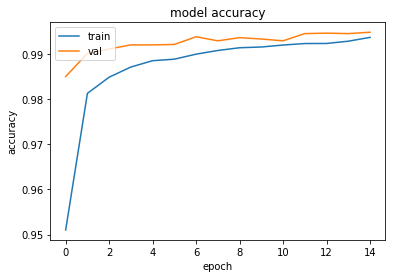

In [41]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model has achieved the target of 99.4% of validation accuracy in epoch 13.

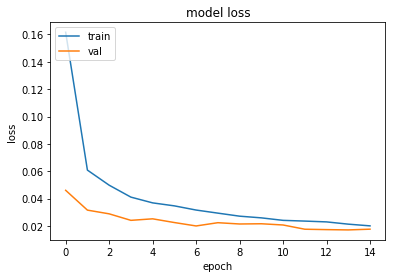

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Training and validation losses are comparable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
#print the ['loss', 'acc']
print(score)

[0.017678084122229484, 0.9948]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

### Finally we can visualize what kernels are extracting.

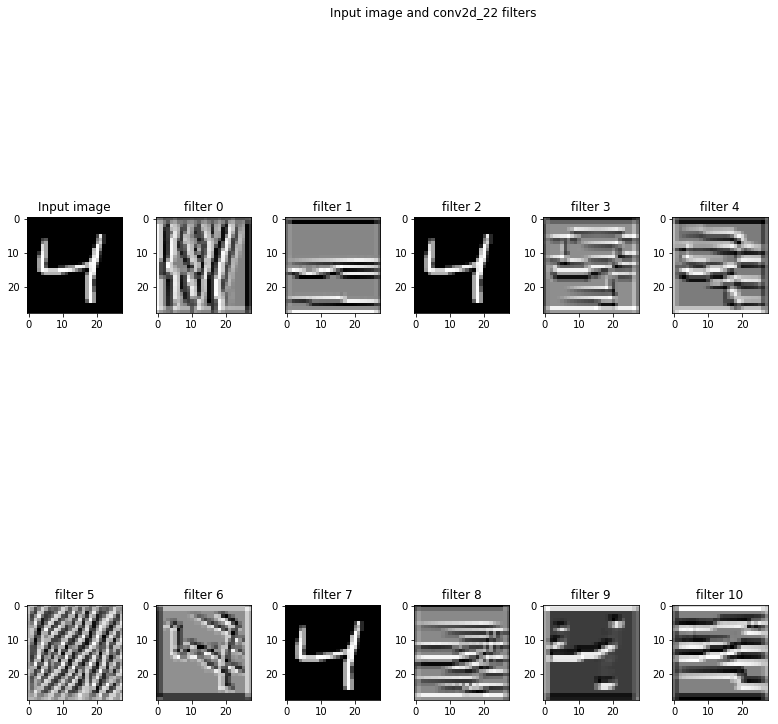

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_22'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()